<a href="https://colab.research.google.com/github/muhammadnadhir6/Project-Portofolio/blob/main/Financial_Consumer_Complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation
We will use the dataset from kaggle, simply copy the import code from the website and paste it in your tools

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sherrytp/consumer-complaints")

In [2]:
import os

os.listdir(path)

['complaints.csv', 'complaints.json']

In [3]:
import pandas as pd
df = pd.read_csv(f"{path}/complaints.csv")

/tmp/ipython-input-3-68274868.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/complaints.csv")


In [4]:
import IPython.display
display(df.count())
display(df.head(3))

,0
Date received,3093136
Product,3093136
Sub-product,2857842
Issue,3093136
Sub-issue,2410198
Consumer complaint narrative,1111330
Company public response,1344256
Company,3093136
State,3053135
ZIP code,3052707


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TX,78541.0,Servicemember,NaN,Web,2022-11-19,In progress,Yes,NaN,6222374
1,2022-10-13,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the fair credit reporting a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30043.0,NaN,Consent provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6079679
2,2022-10-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,This is not a duplicate nor is this complaint ...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90660.0,NaN,Consent provided,Web,2022-10-13,Closed with non-monetary relief,Yes,NaN,6076990


# Data Processing

# 1. Some Resolutions Trigger More Disputes
We'll analyze how response time are related to a dispute chance.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names for easier access
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date columns to datetime
df['date_received'] = pd.to_datetime(df['date_received'])
df['date_sent_to_company'] = pd.to_datetime(df['date_sent_to_company'])

# Create a response time column (in days)
df['response_time_(days)'] = (df['date_sent_to_company'] - df['date_received']).dt.days

# Preview your cleaned dataframe
df.head()

,date_received,product,sub-product,issue,sub-issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id,response_time_(days)
0,2022-11-19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TX,78541.0,Servicemember,NaN,Web,2022-11-19,In progress,Yes,NaN,6222374,0
1,2022-10-13,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the fair credit reporting a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30043.0,NaN,Consent provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6079679,0
2,2022-10-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,This is not a duplicate nor is this complaint ...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90660.0,NaN,Consent provided,Web,2022-10-13,Closed with non-monetary relief,Yes,NaN,6076990,0
3,2022-10-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19148.0,NaN,Consent not provided,Web,2022-10-12,Closed with non-monetary relief,Yes,NaN,6080312,0
4,2022-11-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,44130.0,NaN,NaN,Web,2022-11-19,In progress,Yes,NaN,6222634,0


In [6]:
# Calculate dispute rate by type of company response
dispute_rate = df.groupby('company_response_to_consumer')['consumer_disputed?'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename columns for clarity
dispute_rate.columns = ['Response Type', 'Dispute Rate']
dispute_rate['Dispute Rate (%)'] = (dispute_rate['Dispute Rate'] * 100).round(2)

# Sort by dispute rate
dispute_rate = dispute_rate.sort_values(by='Dispute Rate', ascending=False)

# Display result
dispute_rate

,Response Type,Dispute Rate,Dispute Rate (%)
5,Closed without relief,0.269252,26.93
0,Closed,0.205837,20.58
4,Closed with relief,0.133484,13.35
1,Closed with explanation,0.051155,5.12
2,Closed with monetary relief,0.044229,4.42
3,Closed with non-monetary relief,0.024271,2.43
7,Untimely response,0.000215,0.02
6,In progress,0.000000,0.00


/tmp/ipython-input-16-1794498548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


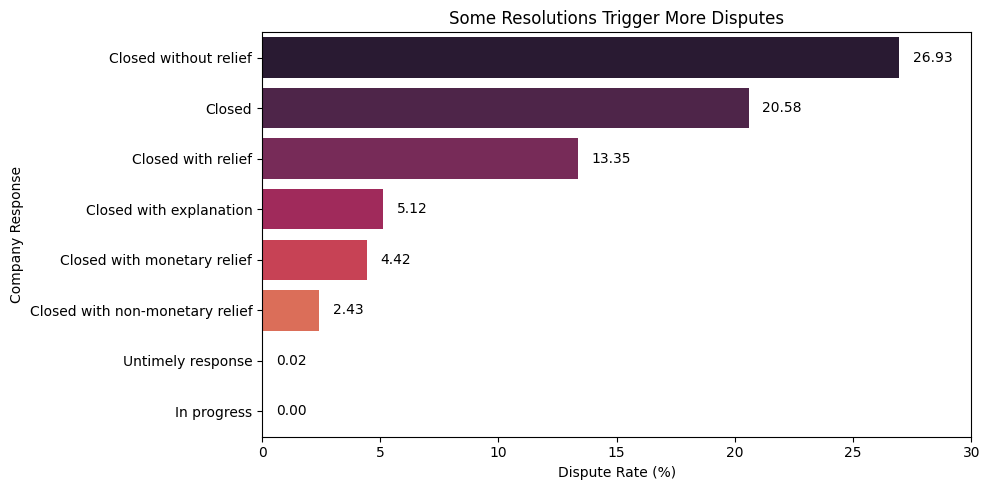

In [16]:
# Making bar chart
plt.figure(figsize=(10,5))
ax1 = sns.barplot(
    data=dispute_rate,
    y='Response Type',
    x='Dispute Rate (%)',
    palette='rocket')
for container in ax1.containers:
    ax1.bar_label(container, padding = 10, fmt='%.2f', fontsize=10)
plt.title('Some Resolutions Trigger More Disputes')
plt.xlabel('Dispute Rate (%)')
plt.ylabel('Company Response')
plt.xlim(0, 30)
plt.tight_layout()
plt.show()

# 2. Faster Responses = Fewer Disputes
Are companies less likely to get disputed if they respond quickly?

In [8]:
# Determine fast response = 3 days or less
df['fast_response'] = df['response_time_(days)'] <= 3

# Grouping fast/slow response and calculate dispute rate
speed_dispute = df.groupby('fast_response')['consumer_disputed?'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename columns for clarity
speed_dispute.columns = ['Fast Response (≤3 days)', 'Dispute Rate']
speed_dispute['Dispute Rate (%)'] = (speed_dispute['Dispute Rate'] * 100).round(2)

# Display table
speed_dispute

,Fast Response (≤3 days),Dispute Rate,Dispute Rate (%)
0,False,0.101811,10.18
1,True,0.041309,4.13


/tmp/ipython-input-18-3709345002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


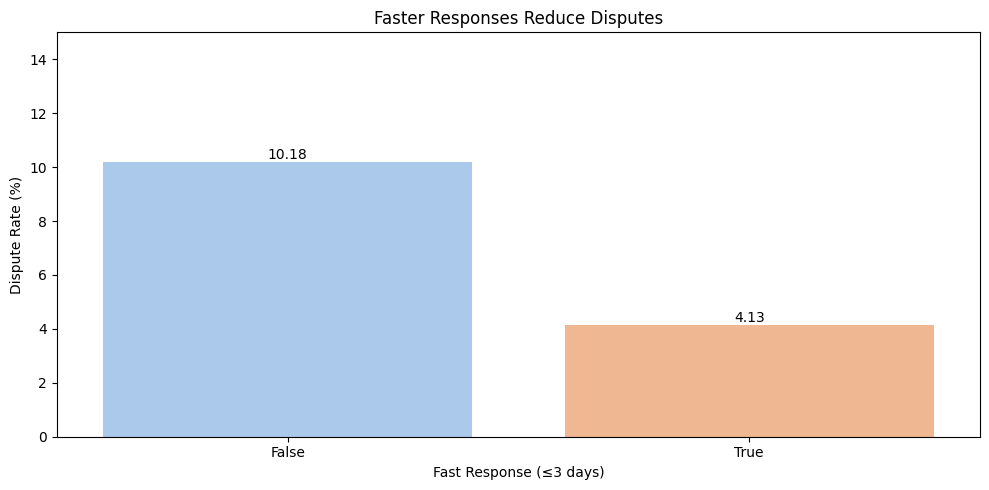

In [18]:
# Making bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=speed_dispute,
    x='Fast Response (≤3 days)',
    y='Dispute Rate (%)',
    palette='pastel'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
plt.title('Faster Responses Reduce Disputes')
plt.ylabel('Dispute Rate (%)')
plt.ylim(0, 15)
plt.tight_layout()
plt.show()

# 3. Some Issues Almost Always Escalate
What types of complaints are most likely to be disputed?

In [10]:
# Group by issue type and calculate dispute rate
issue_dispute = df.groupby('issue')['consumer_disputed?'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename and format columns
issue_dispute.columns = ['Issue', 'Dispute Rate']
issue_dispute['Dispute Rate (%)'] = (issue_dispute['Dispute Rate'] * 100).round(2)

# Sort by dispute rate, take top 10
top_issues = issue_dispute.sort_values(by='Dispute Rate', ascending=False).head(10)

# Display the table
top_issues


,Issue,Dispute Rate,Dispute Rate (%)
78,Lender damaged or destroyed property,0.666667,66.67
81,Lender sold the property,0.428571,42.86
24,Cash advance,0.285714,28.57
136,Settlement process and costs,0.275168,27.52
9,"Application, originator, mortgage broker",0.258343,25.83
134,Rewards,0.256516,25.65
44,Credit line increase/decrease,0.250801,25.08
41,Credit decision / Underwriting,0.249469,24.95
12,Arbitration,0.249284,24.93
61,Forbearance / Workout plans,0.248201,24.82


/tmp/ipython-input-35-2255705598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


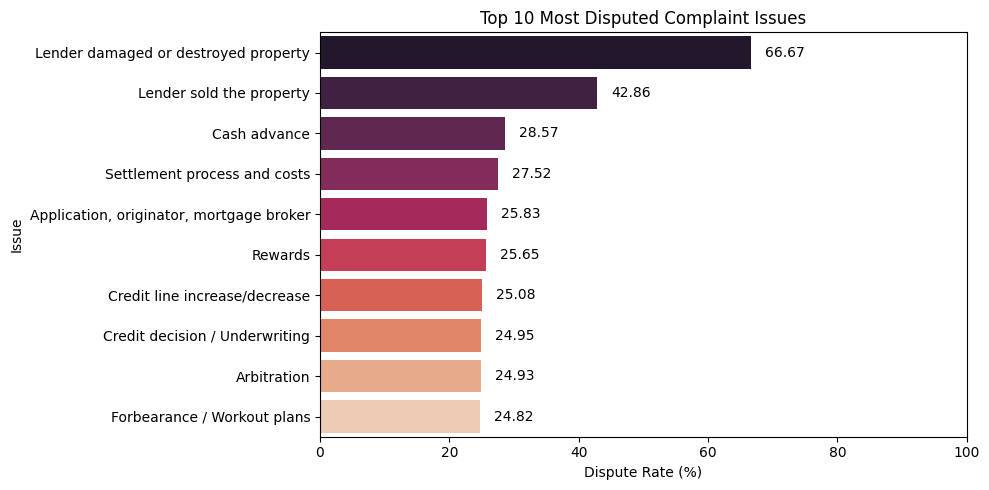

In [35]:
# Making bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top_issues,
    x='Dispute Rate (%)',
    y='Issue',
    palette='rocket'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding = 10)
plt.title('Top 10 Most Disputed Complaint Issues')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# 4. Do Repeated Complaints Escalate More?
Identify if complaints with the same narrative appear multiple times (proxy for recurring or widespread issues) and whether those are more likely to be disputed.

In [24]:
# Create a flag for repeated complaint narratives
df['is_repeat'] = df.duplicated(subset='consumer_complaint_narrative', keep=False)

# Calculate dispute rate for repeated vs non-repeated complaints
repeat_summary = df.groupby('is_repeat')['consumer_disputed?'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Clean up labels for readability
repeat_summary['is_repeat'] = repeat_summary['is_repeat'].map({True: 'Yes', False: 'No'})
repeat_summary.columns = ['Repeated Narrative', 'Dispute Rate']
repeat_summary['Dispute Rate (%)'] = (repeat_summary['Dispute Rate'] * 100).round(2)

# Show result
repeat_summary

,Repeated Narrative,Dispute Rate,Dispute Rate (%)
0,No,0.038106,3.81
1,Yes,0.052137,5.21


/tmp/ipython-input-42-3751731276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


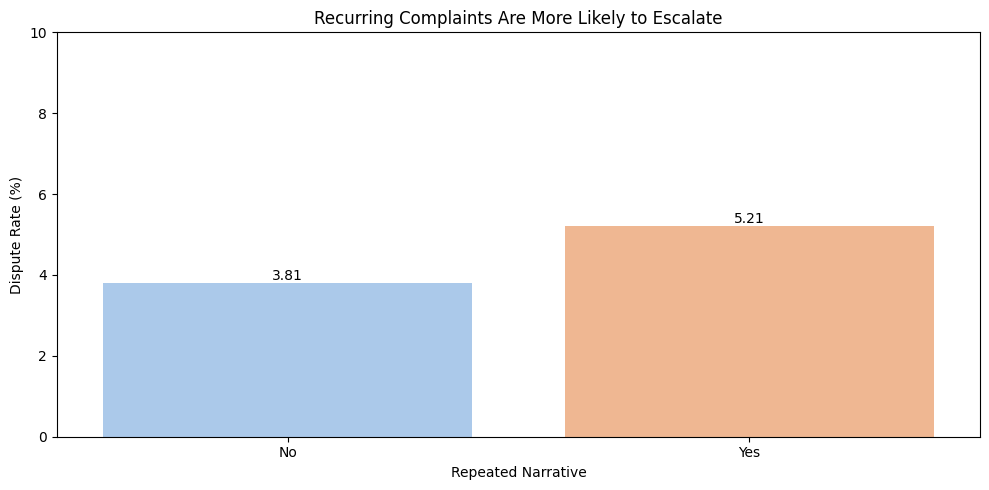

In [42]:
# Making bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=repeat_summary,
    x='Repeated Narrative',
    y='Dispute Rate (%)',
    palette='pastel'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)
plt.title('Recurring Complaints Are More Likely to Escalate')
plt.ylabel('Dispute Rate (%)')
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

# 5. Which Products Escalate More, Even If They’re Not Most Complained?
Compare product complaint share vs dispute rate to find high escalation products.

In [32]:
# Remove rows with missing product values
df_product = df[df['product'].notna()]

# Aggregate complaint count and dispute rate by product
product_summary = df_product.groupby('product')['consumer_disputed?'].agg(Complaints='count', DisputeRate=lambda x: (x == 'Yes').mean()).reset_index()

# Add complaint share column
total_complaints = product_summary['Complaints'].sum()
product_summary['Complaint Share (%)'] = (product_summary['Complaints'] / total_complaints * 100).round(2)

# Add formatted dispute rate %
product_summary['Dispute Rate (%)'] = (product_summary['DisputeRate'] * 100).round(2)

# Sort by dispute rate to highlight surprising insights
product_summary_sort = product_summary.sort_values(by='Complaints', ascending=False).head(10)
product_summary_sorted = product_summary_sort.sort_values(by='Dispute Rate (%)', ascending=False)

# Show top results
product_summary_sorted[['product', 'Complaints','Complaint Share (%)', 'Dispute Rate (%)']]


,product,Complaints,Complaint Share (%),Dispute Rate (%)
2,Consumer Loan,31596,4.11,21.43
3,Credit card,89190,11.61,20.41
0,Bank account or service,86206,11.22,18.59
5,Credit reporting,140430,18.27,15.75
9,Money transfers,5354,0.70,14.61
12,Payday loan,5543,0.72,14.38
10,Mortgage,226897,29.53,14.07
14,Prepaid card,3819,0.50,14.04
15,Student loan,32537,4.23,8.31
7,Debt collection,145792,18.97,5.67


/tmp/ipython-input-45-1441527827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


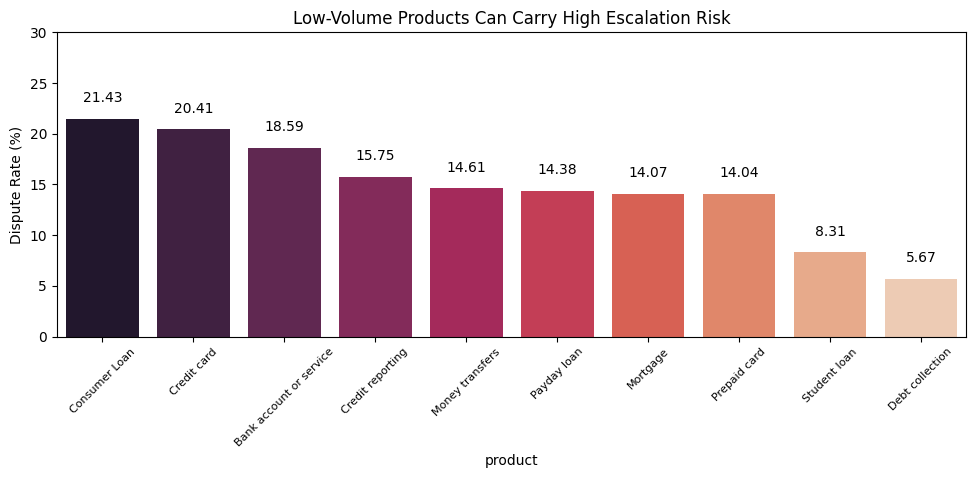

In [45]:
# Making bar chart
plt.figure(figsize=(10, 4))
ax = sns.barplot(
    data=product_summary_sorted,
    x='product',
    y='Dispute Rate (%)',
    palette='rocket'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding = 10)
plt.title('Low-Volume Products Can Carry High Escalation Risk')
plt.ylim(0, 30)
plt.tight_layout()
plt.xticks(rotation=45, fontsize=8)
plt.show()